In [2]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
import sys


def apply_window_sum(data, group_size):
    """
    Apply a summing window of given size to the data for coarser granular analysis.
    The function groups data into batches of 'group_size' and then sums them.
    """
    # Create a 'group' column that identifies which group each row belongs to
    data['group'] = data.index // group_size

    # Group by 'group' and sum up the other columns
    windowed_data = data.groupby('group').agg({
        'timestamp': 'mean',  # or 'first', depending on what you want
        'address': 'first',  # keeping the first address for each group
        'count': 'sum'
    }).reset_index(drop=True)

    return windowed_data

def select_top_n(data, n):
    """
    Select the top n most frequently accessed addresses.
    """
    return data.groupby('address').sum().sort_values(by='count', ascending=False).head(n)

def trim_data(data, window_size, start_idx):
    """
    Trim the data to the given window size.
    """

    # Trim the data to the given window size
    data = data.iloc[start_idx:start_idx+window_size]

    # Reset the index
    data = data.reset_index(drop=True)
    
    return data

def extract_cols(data):
    x = data['timestamp']
    y = (data['address']).apply(lambda x: int(str(x), 16))
    z = data['count']
    return x, y, z

def draw_scatter_plot(data, length, start_idx):
    data_plot = trim_data(data, length, start_idx)
    x, y, z = extract_cols(data_plot)
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a wireframe 3D plot
    ax.scatter(x, y, z, c='b', marker='o')
    
    # Set labels for the axes
    ax.set_xlabel('timestamp')
    ax.set_ylabel('address')
    ax.set_zlabel('frequency')
    ax.set_title('Stores and Loads')


In [3]:

file_path = "/tmp/tpcds-trace/query_1_scale_1_rngseed_0_n1-standard-8.csv"

skip_rows = 0
with open(file_path, 'r') as f:
    for line in f:
        if "---- <application exited with code 0> ----" in line:
            break
        skip_rows += 1

# Load the data from the CSV file, skipping the found number of rows
data = pd.read_csv(file_path, skiprows=range(0, skip_rows + 1), sep=',')

data.head()


,timestamp,address,count,type
0,1023869410,2198822533349,1,Store
1,1023869410,2198822533353,1,Store
2,1023869410,2198822533354,7,Store
3,1023869410,2191465986132,2,Store
4,1023869410,2198822533355,4,Store


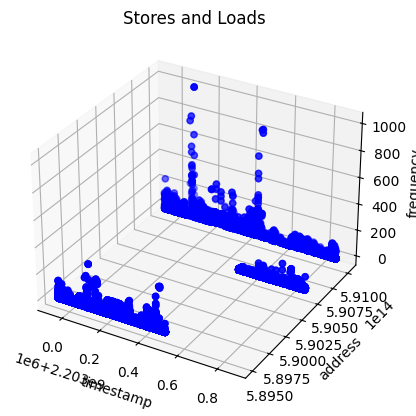

In [4]:
draw_scatter_plot(data, 100000, 100000)

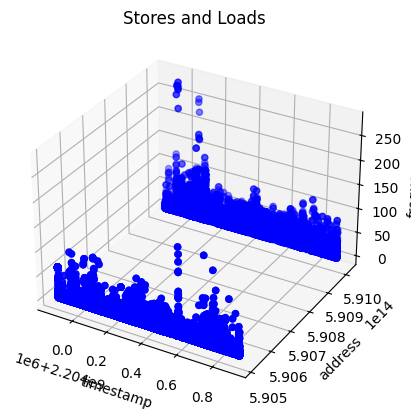

In [5]:
draw_scatter_plot(data, 100000, 200000)

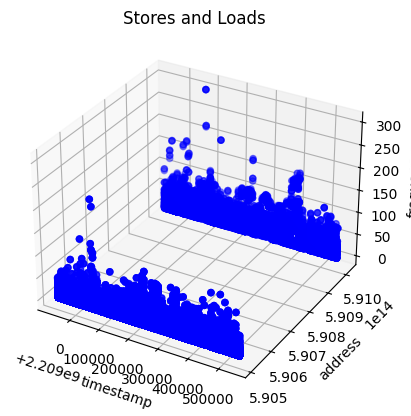

In [6]:
draw_scatter_plot(data, 100000, 1000000)